In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

In [2]:
# read in your data
train  = pd.read_csv('./input/train.csv', header=None)
labels = pd.read_csv('./input/trainLabels.csv', header=None)
test   = pd.read_csv('./input/test.csv', header=None)

In [3]:
# check the packaging
print ('Train dimension: %i-%i'%train.shape)
print ('Labels dimension: %i-%i'%labels.shape)
print ('Test dimension: %i-%i'%test.shape)

Train dimension: 1000-40
Labels dimension: 1000-1
Test dimension: 9000-40


In [4]:
# look at the top of your data: train
train.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,...,-0.850465,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,-0.819750,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,-0.604501,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.022959,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,0.513906,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332


In [5]:
# look at the bottom of your data: train
train.tail()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
995,-0.310429,0.826811,-0.952245,0.768850,1.877520,1.320646,1.944609,1.191420,-0.127724,0.070937,...,-0.600411,-0.383792,0.745596,-0.698598,-2.729937,-0.431535,0.372873,1.019092,-2.672811,-0.295141
996,-1.853879,0.246726,0.459921,-2.074267,7.599220,-0.138355,-4.501900,0.630634,-1.590533,-1.112949,...,0.361736,0.240052,-0.856196,-0.072481,-2.935896,0.582411,-2.613407,0.036687,2.809310,4.412567
997,0.912748,-1.734039,-1.047035,0.217573,13.457812,0.162771,-2.250521,2.216161,-0.378326,0.642114,...,1.195896,-1.073806,-2.754369,1.814864,-4.190105,-1.116441,-2.100125,0.061513,0.895536,0.813686
998,2.439780,-0.735511,-0.902426,1.365036,-10.430299,-0.856859,2.686474,0.292035,0.585388,-0.876965,...,2.262326,-0.039488,0.773876,-0.916066,2.604827,-0.649874,-3.423674,0.229748,-2.311088,-3.422217
999,0.228994,-0.085453,0.876582,1.057401,-1.404015,-1.091965,0.639176,0.701332,-0.906577,-0.390940,...,0.471415,1.024757,-1.796571,0.603161,0.862705,0.747234,3.275681,0.400372,-3.431031,2.370080


In [6]:
# look at the top of your data: test
test.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,2.808909,-0.242894,-0.546421,0.255162,1.749736,-0.030458,-1.322071,3.578071,-0.667578,-0.884257,...,-0.261688,-0.224375,-1.675606,-0.479584,-0.244388,-0.672355,0.517860,0.010665,-0.419214,2.818387
1,-0.374101,0.537669,0.081063,0.756773,0.915231,2.557282,3.703187,1.673835,-0.764122,-1.228040,...,-0.969463,0.574154,-2.200519,-1.612240,0.179031,-2.924596,0.643610,-1.470939,-0.067408,-0.976265
2,-0.088370,0.154743,0.380716,-1.176126,1.699867,-0.258627,-1.384999,1.093584,1.596633,0.230631,...,-0.769885,-0.005143,1.467490,0.483803,-3.542981,0.814561,-1.652948,1.265866,-1.749248,1.773784
3,-0.685635,0.501283,1.873375,0.215224,-3.983468,-0.103637,4.136113,-0.225431,-1.515015,-1.071763,...,0.968609,2.386412,-0.131219,0.285646,2.302069,1.255588,-1.563090,-0.125258,-1.030761,-2.945329
4,0.350867,0.721897,-0.477104,-1.748776,-2.627405,1.075433,4.954253,-3.293501,-0.760369,0.204360,...,0.260553,-2.045650,-2.173227,0.372992,0.450700,-0.211657,1.301359,-0.522164,2.484883,0.039213


In [7]:
# look at the top of your data: labels
labels.head()

,0
0,1
1,0
2,0
3,1
4,0


In [8]:
# look at the bottom of your data: labels
labels.tail()

,0
995,0
996,1
997,1
998,0
999,0


In [9]:
# look at the bottom of your data: test
test.tail()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
8995,0.171644,-0.806952,-2.045671,0.021156,2.258491,0.429469,0.857187,0.972600,1.707492,1.676370,...,-1.366312,0.276543,-0.732764,0.243930,-1.151233,-0.274298,0.573013,1.109814,-1.905965,1.457601
8996,1.168564,-0.911253,1.685492,0.867183,3.606170,-0.673875,-1.889365,0.411385,-0.206817,-0.705771,...,0.557757,0.379841,-1.474198,-0.322943,1.964519,0.122384,0.678023,2.024129,0.386542,1.104493
8997,0.052274,-1.736558,-0.263699,-0.219329,8.918393,-1.258320,-3.361146,0.893366,-0.631669,1.887286,...,2.117847,-1.050824,0.182872,0.242725,0.670161,0.112752,-3.006949,1.179606,1.156340,-1.218561
8998,1.443659,0.651892,0.550724,-1.146664,2.621641,-0.867143,0.312742,1.078004,-1.212524,-0.028143,...,0.631480,1.186236,-1.098508,1.159658,-1.957241,0.482533,3.777669,-0.424954,1.333374,2.325271
8999,-0.429145,-0.110821,1.257230,-0.088150,-3.925020,-0.251062,-2.212032,-2.692121,-0.005468,0.186300,...,0.384256,0.520610,1.594873,-0.352201,0.152333,-1.772249,0.758809,0.617485,1.464438,3.301445


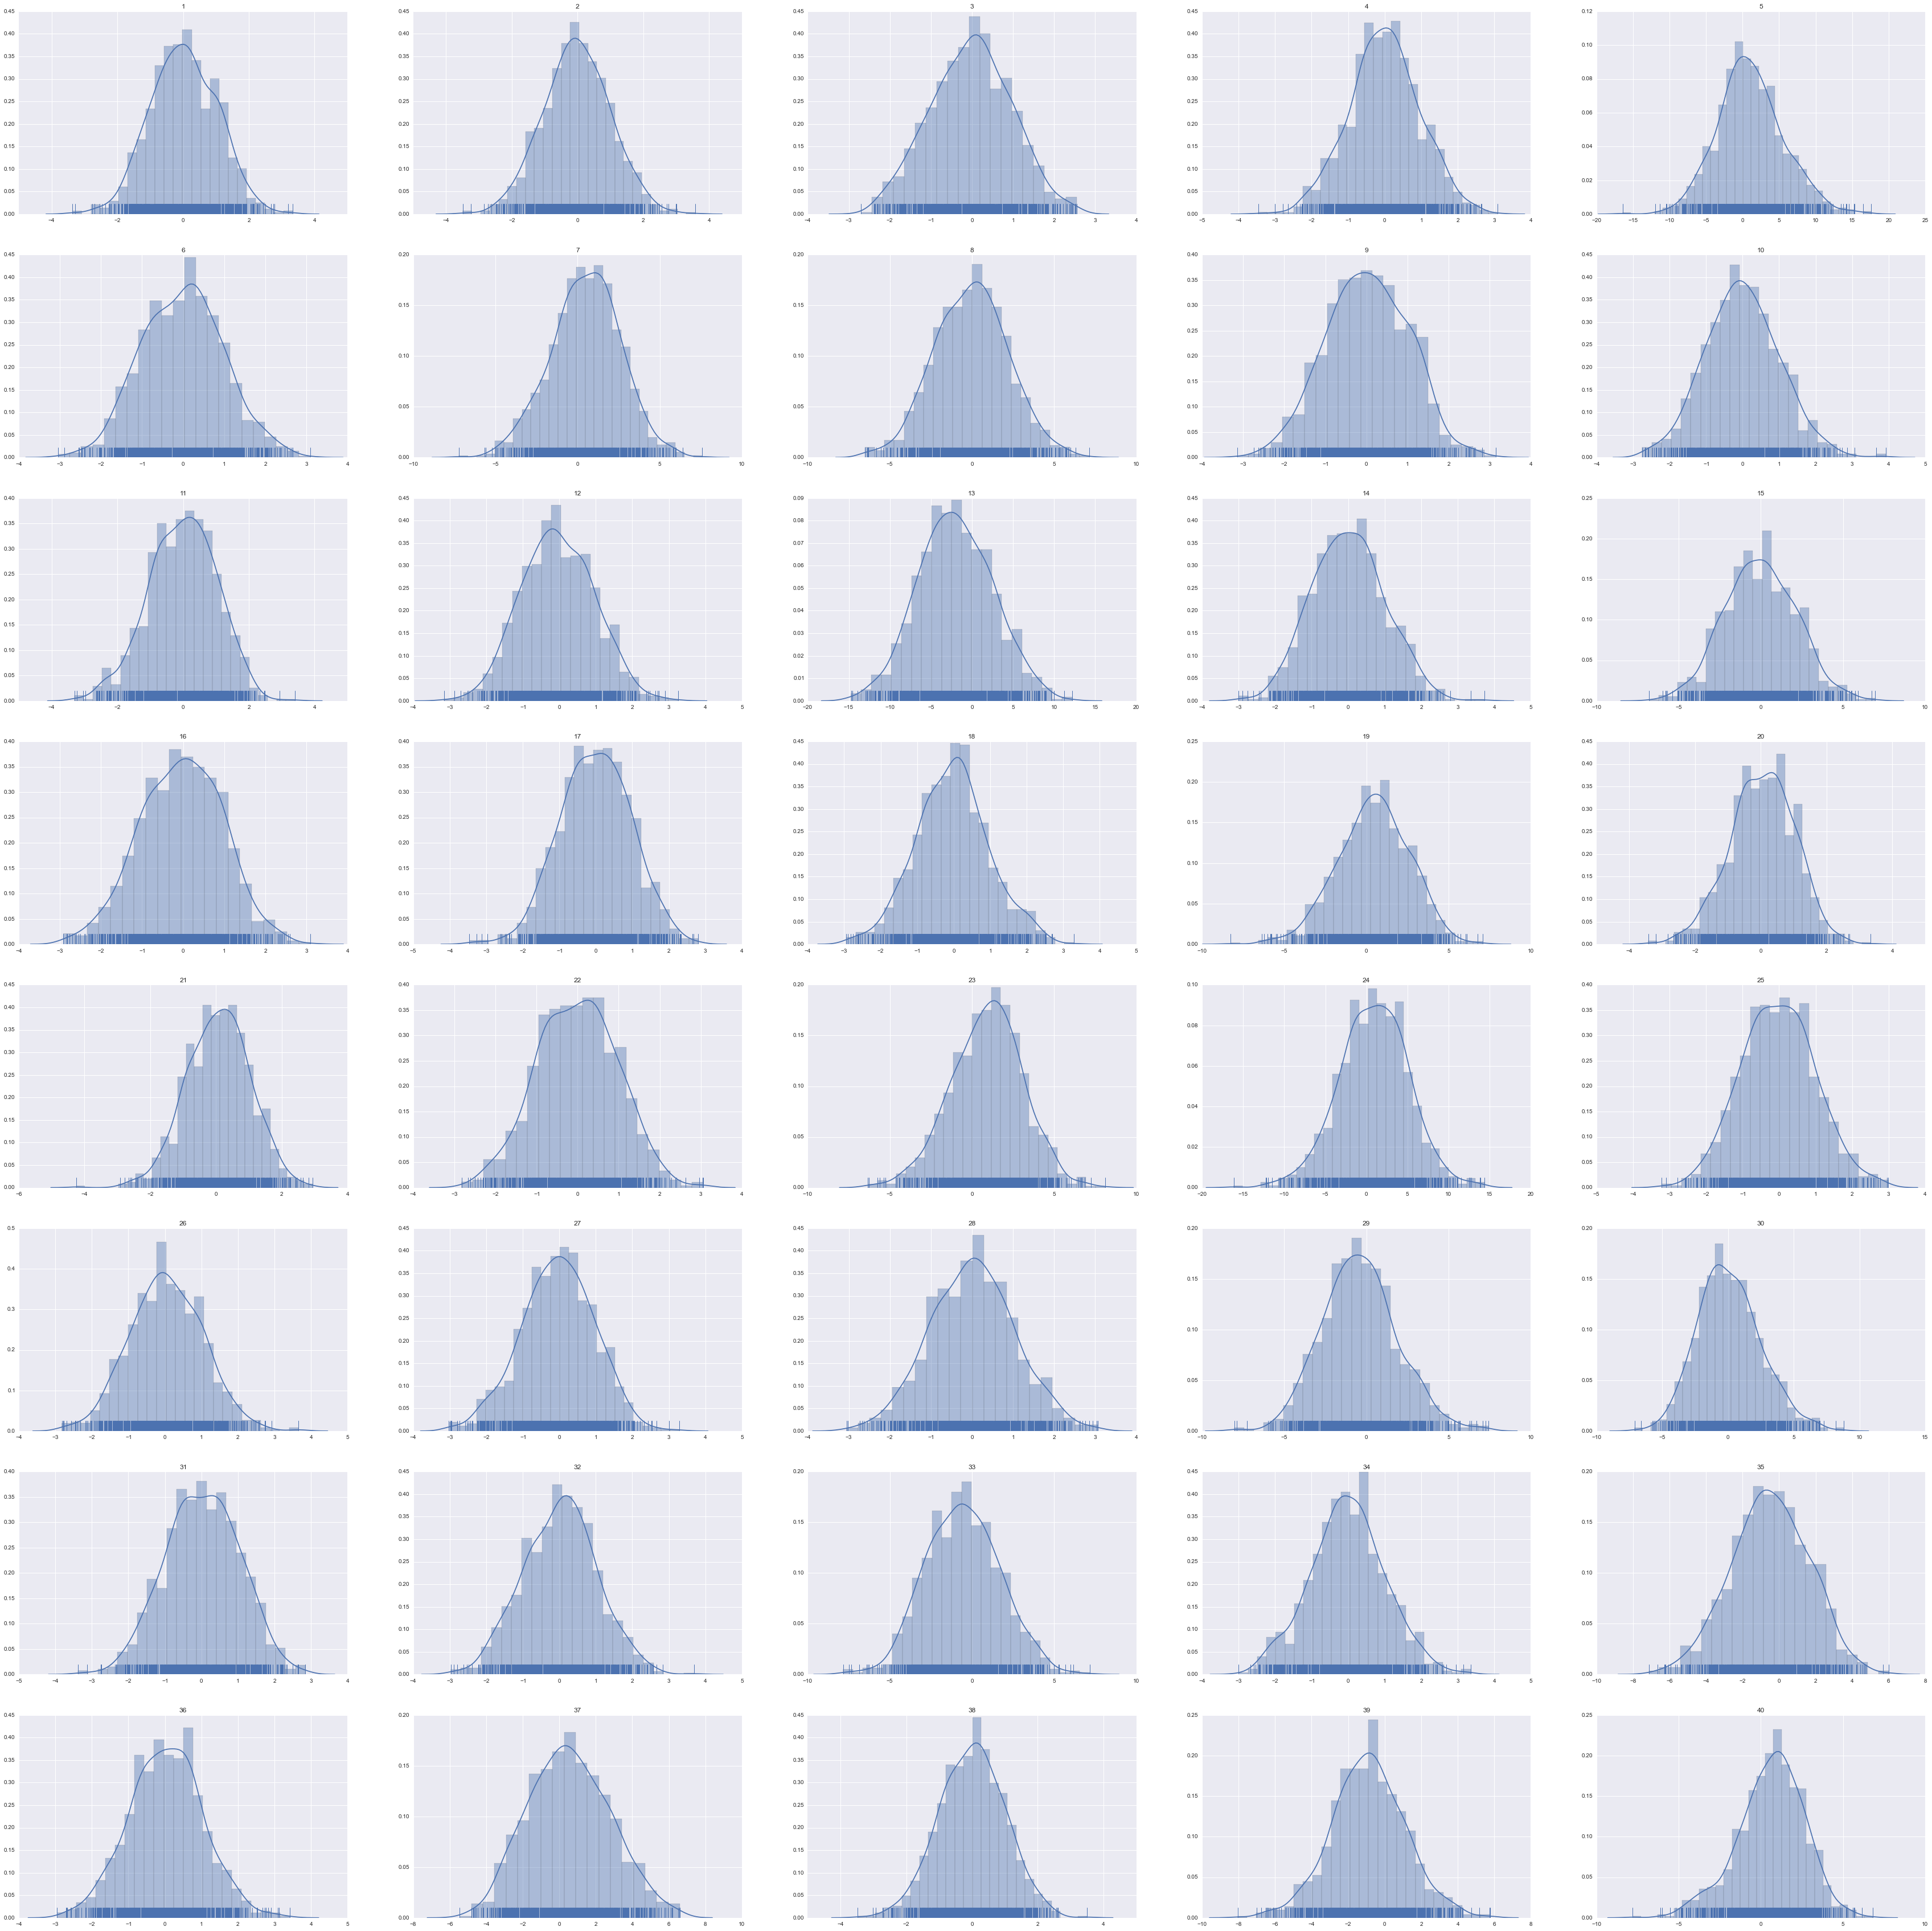

In [10]:
# look at your data - histograms
np_train  = np.asarray(train)
np_labels = np.asarray(labels)
plt.figure(figsize=(60,60))
kdx = 1
for idx in range(np_train.shape[1]):
    plt.subplot(8,5,kdx)
    #plt.hist(np_train[:,idx],  normed=1, histtype='bar', rwidth=0.8)
    sns.distplot(np_train[:,idx], rug=True)
    plt.title(idx+1)
    kdx +=1 

/Users/piero/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/Users/piero/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


/Users/piero/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


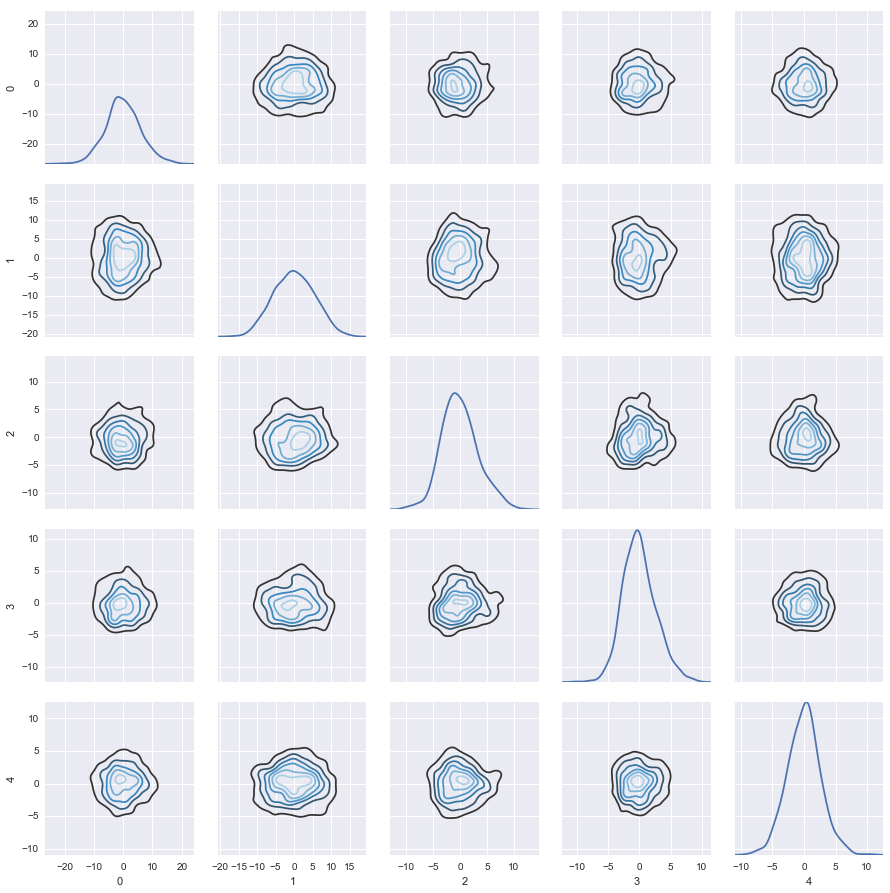

In [11]:
# Visualizing pairwise relationships of the dataset
# Since the number of features is too high, 5 PCA components are shown
from sklearn.decomposition import PCA

pca       = PCA(n_components = 5)
train_pca = pca.fit_transform(train)

plt.figure(figsize=(60,60))
g = sns.PairGrid(pd.DataFrame(train_pca))
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap='Blues_d',n_levels=6)

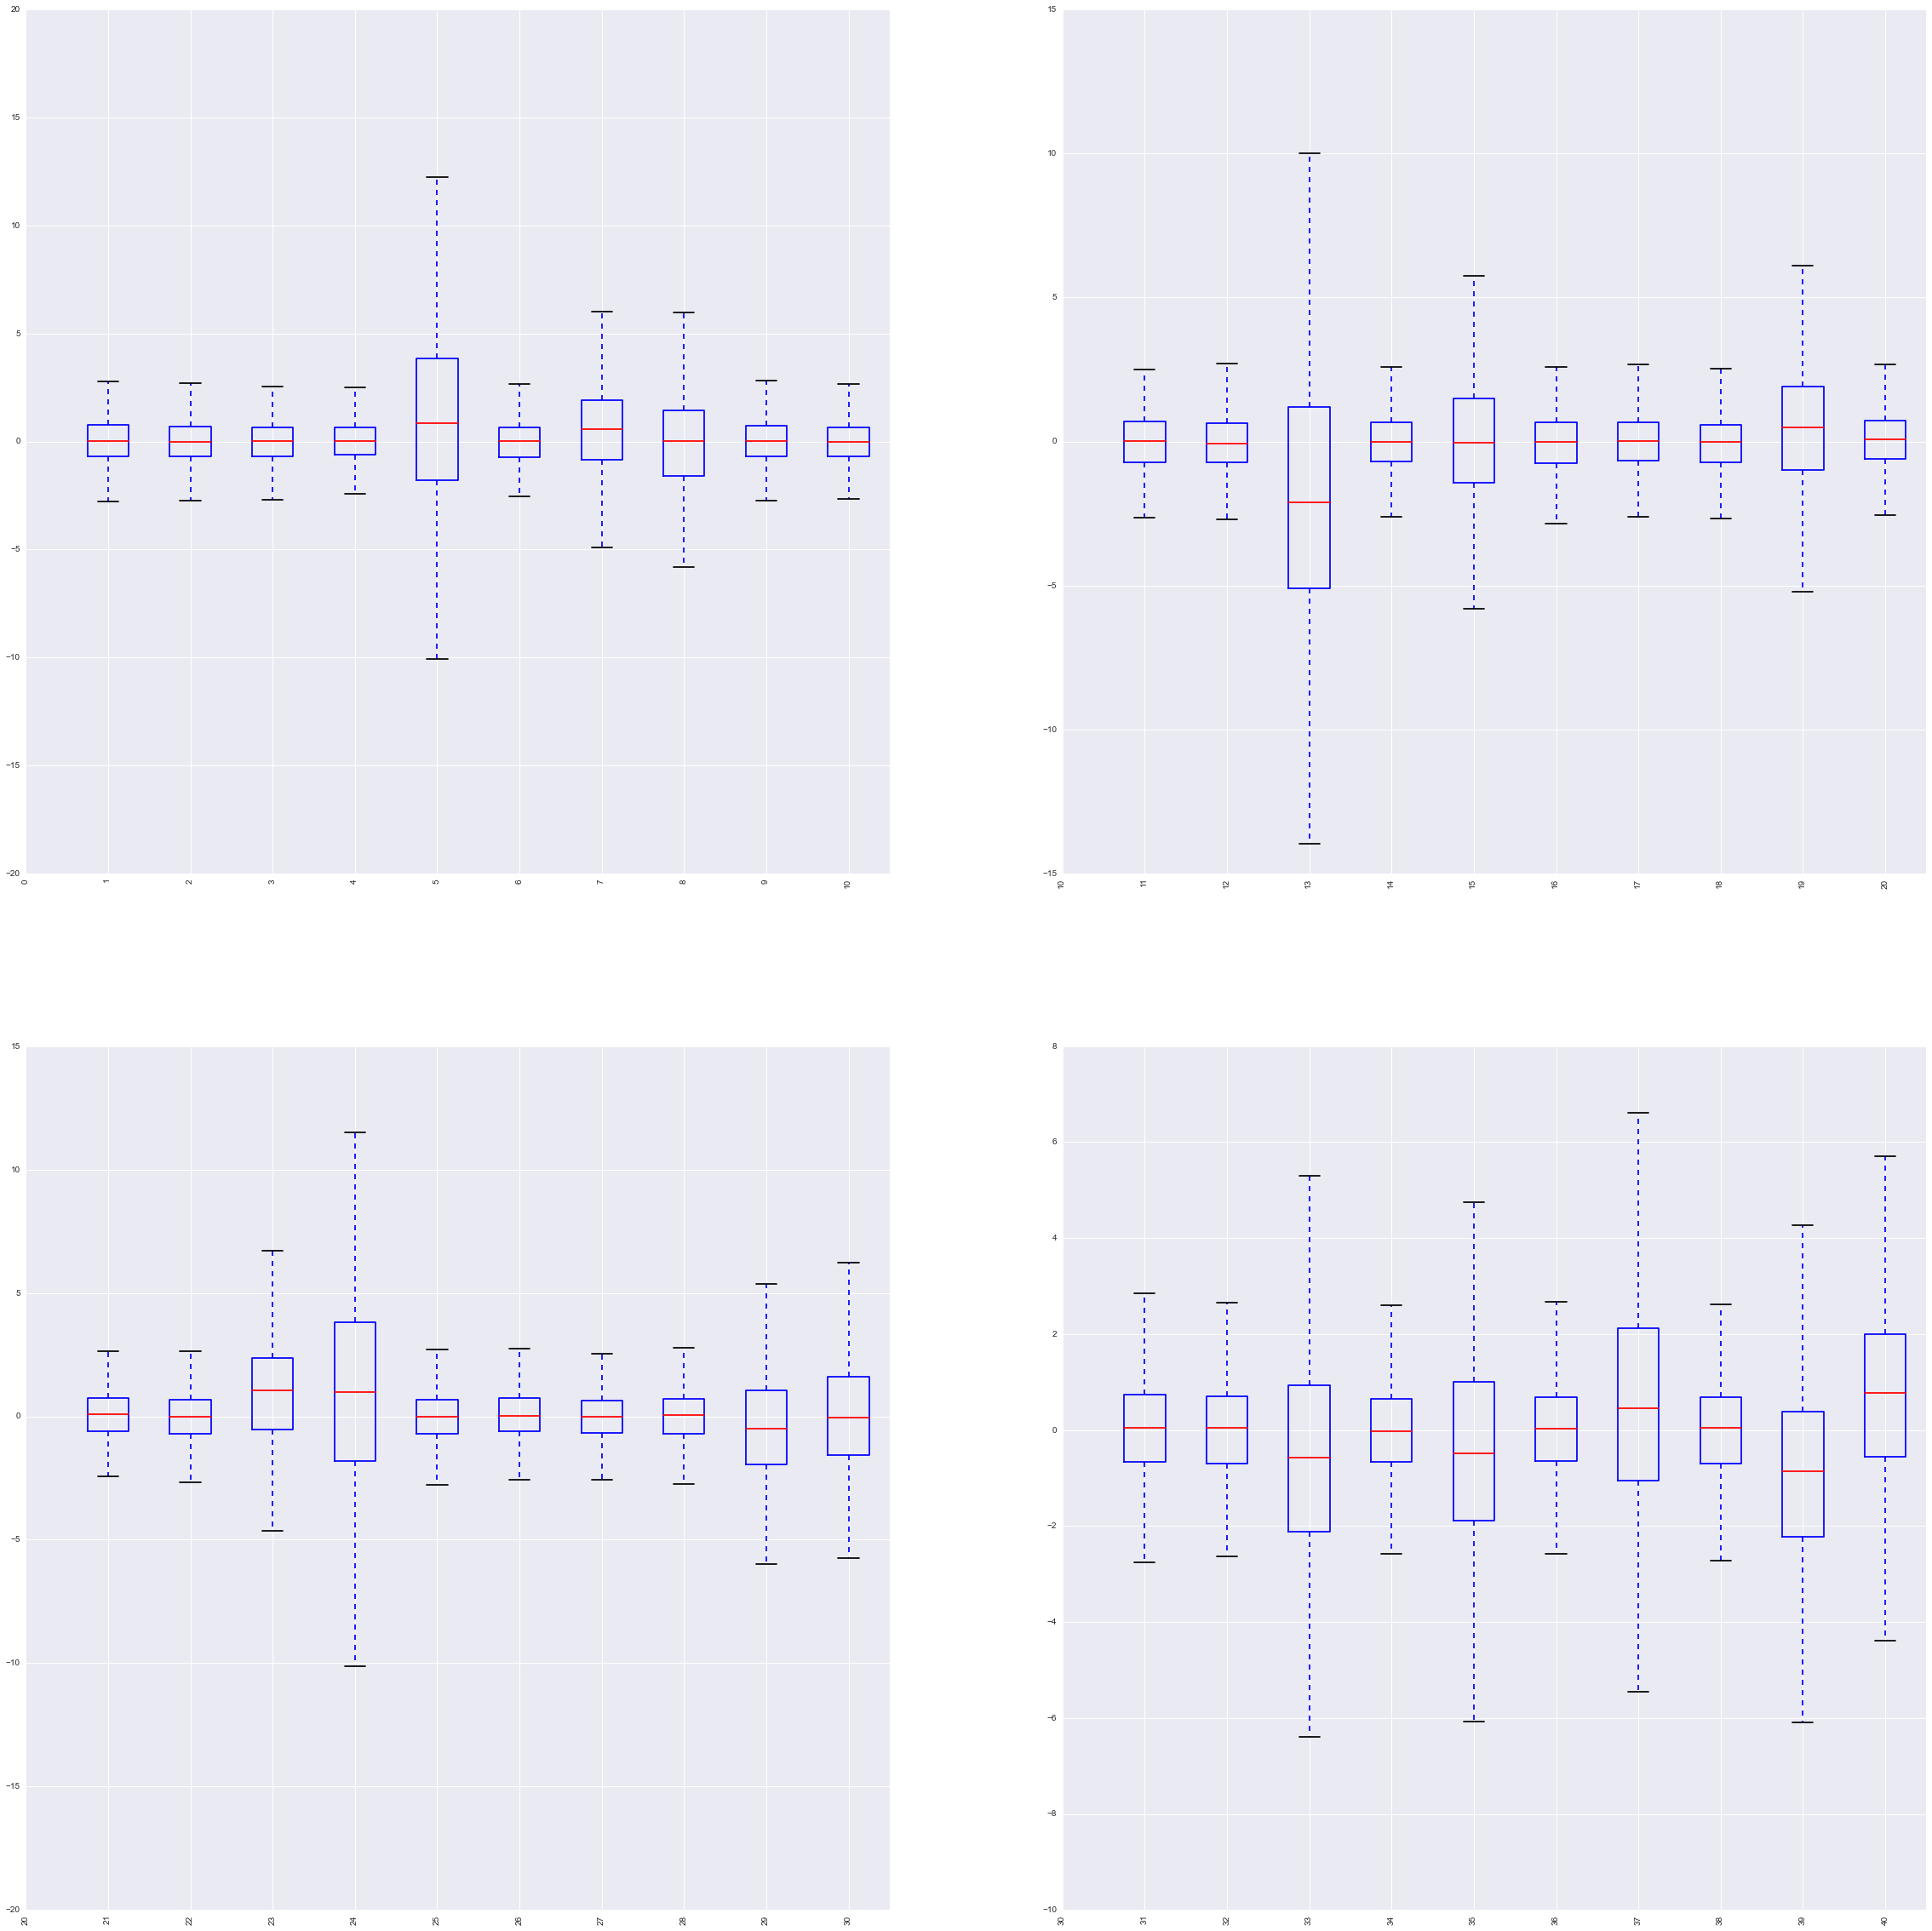

In [12]:
# boxplots
"""
Basic version
TODO: Improve this version using a parametric version adapted to the step size 
"""

plt.figure(figsize=(40,40))
step = 10
kdx = 1
for idx in range(0,np_train.shape[1],step):
    plt.subplot(2,2,kdx)
    plt.boxplot(np_train[:,idx:idx+step])
    plt.xticks(range(step+1), range(idx,idx+step+1),rotation='vertical')
    kdx +=1 

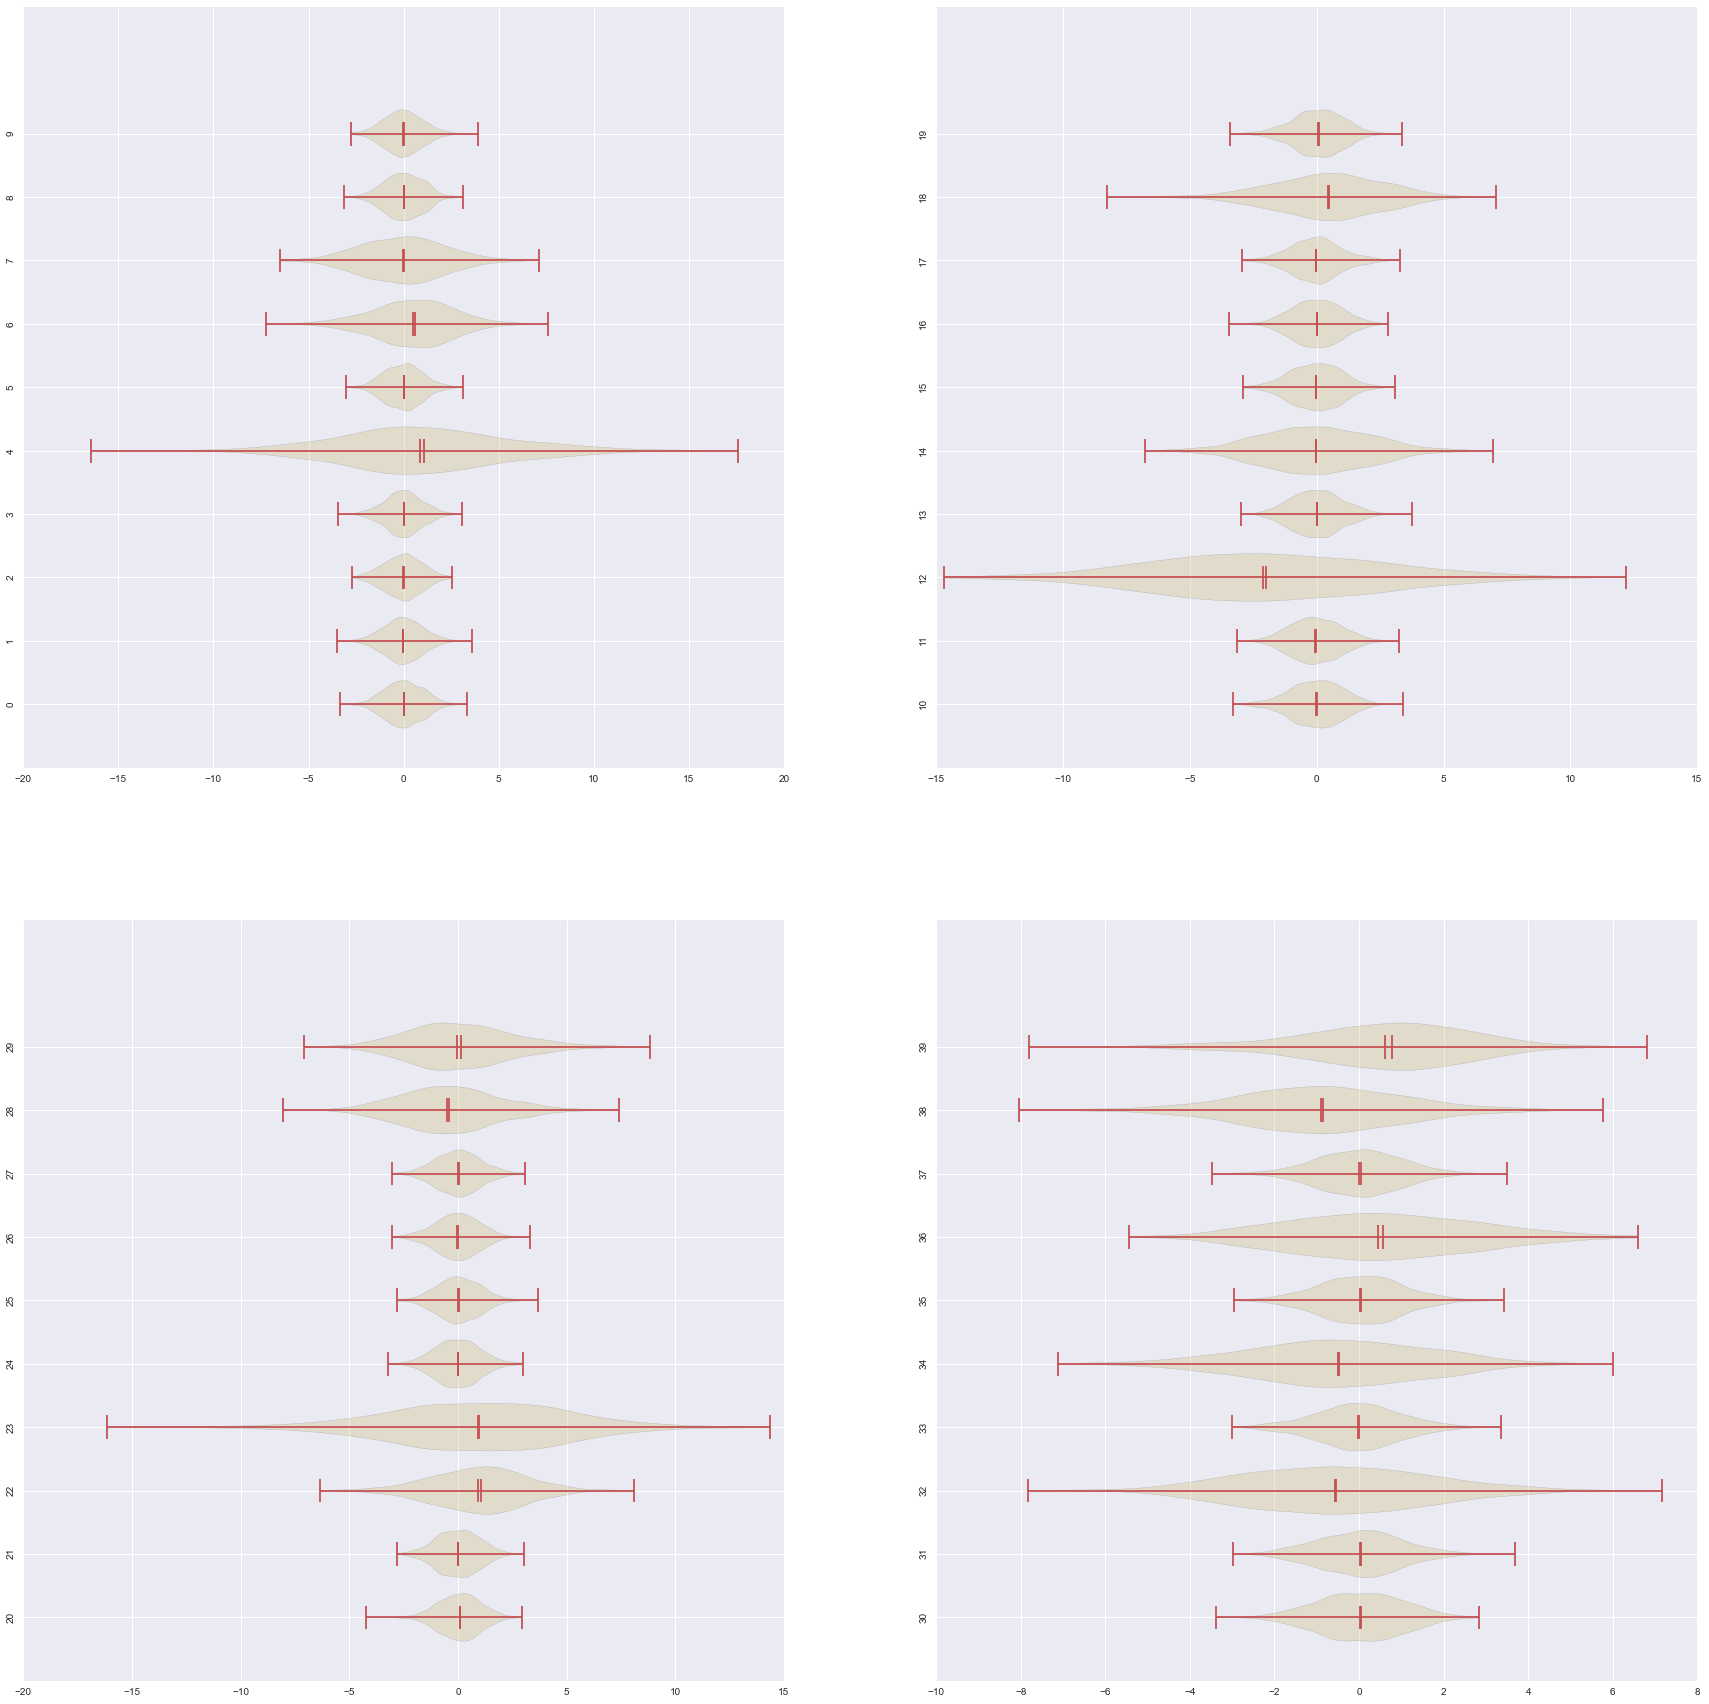

In [15]:
# violins plots

"""
Basic version
TODO: Improve this version using a parametric version adapted to the step size 
"""

plt.figure(figsize=(30,30))
step = 10
kdx = 1
for idx in range(0,np_train.shape[1],step):
    plt.subplot(2,2,kdx)
    plt.violinplot(np_train[:,idx:idx+step],  points=100, vert=False,
               widths=0.75,showmeans=True, showextrema=True, showmedians=True)
    plt.yticks(range(1,step+1), range(idx,idx+step+1),rotation='vertical')
    kdx +=1 

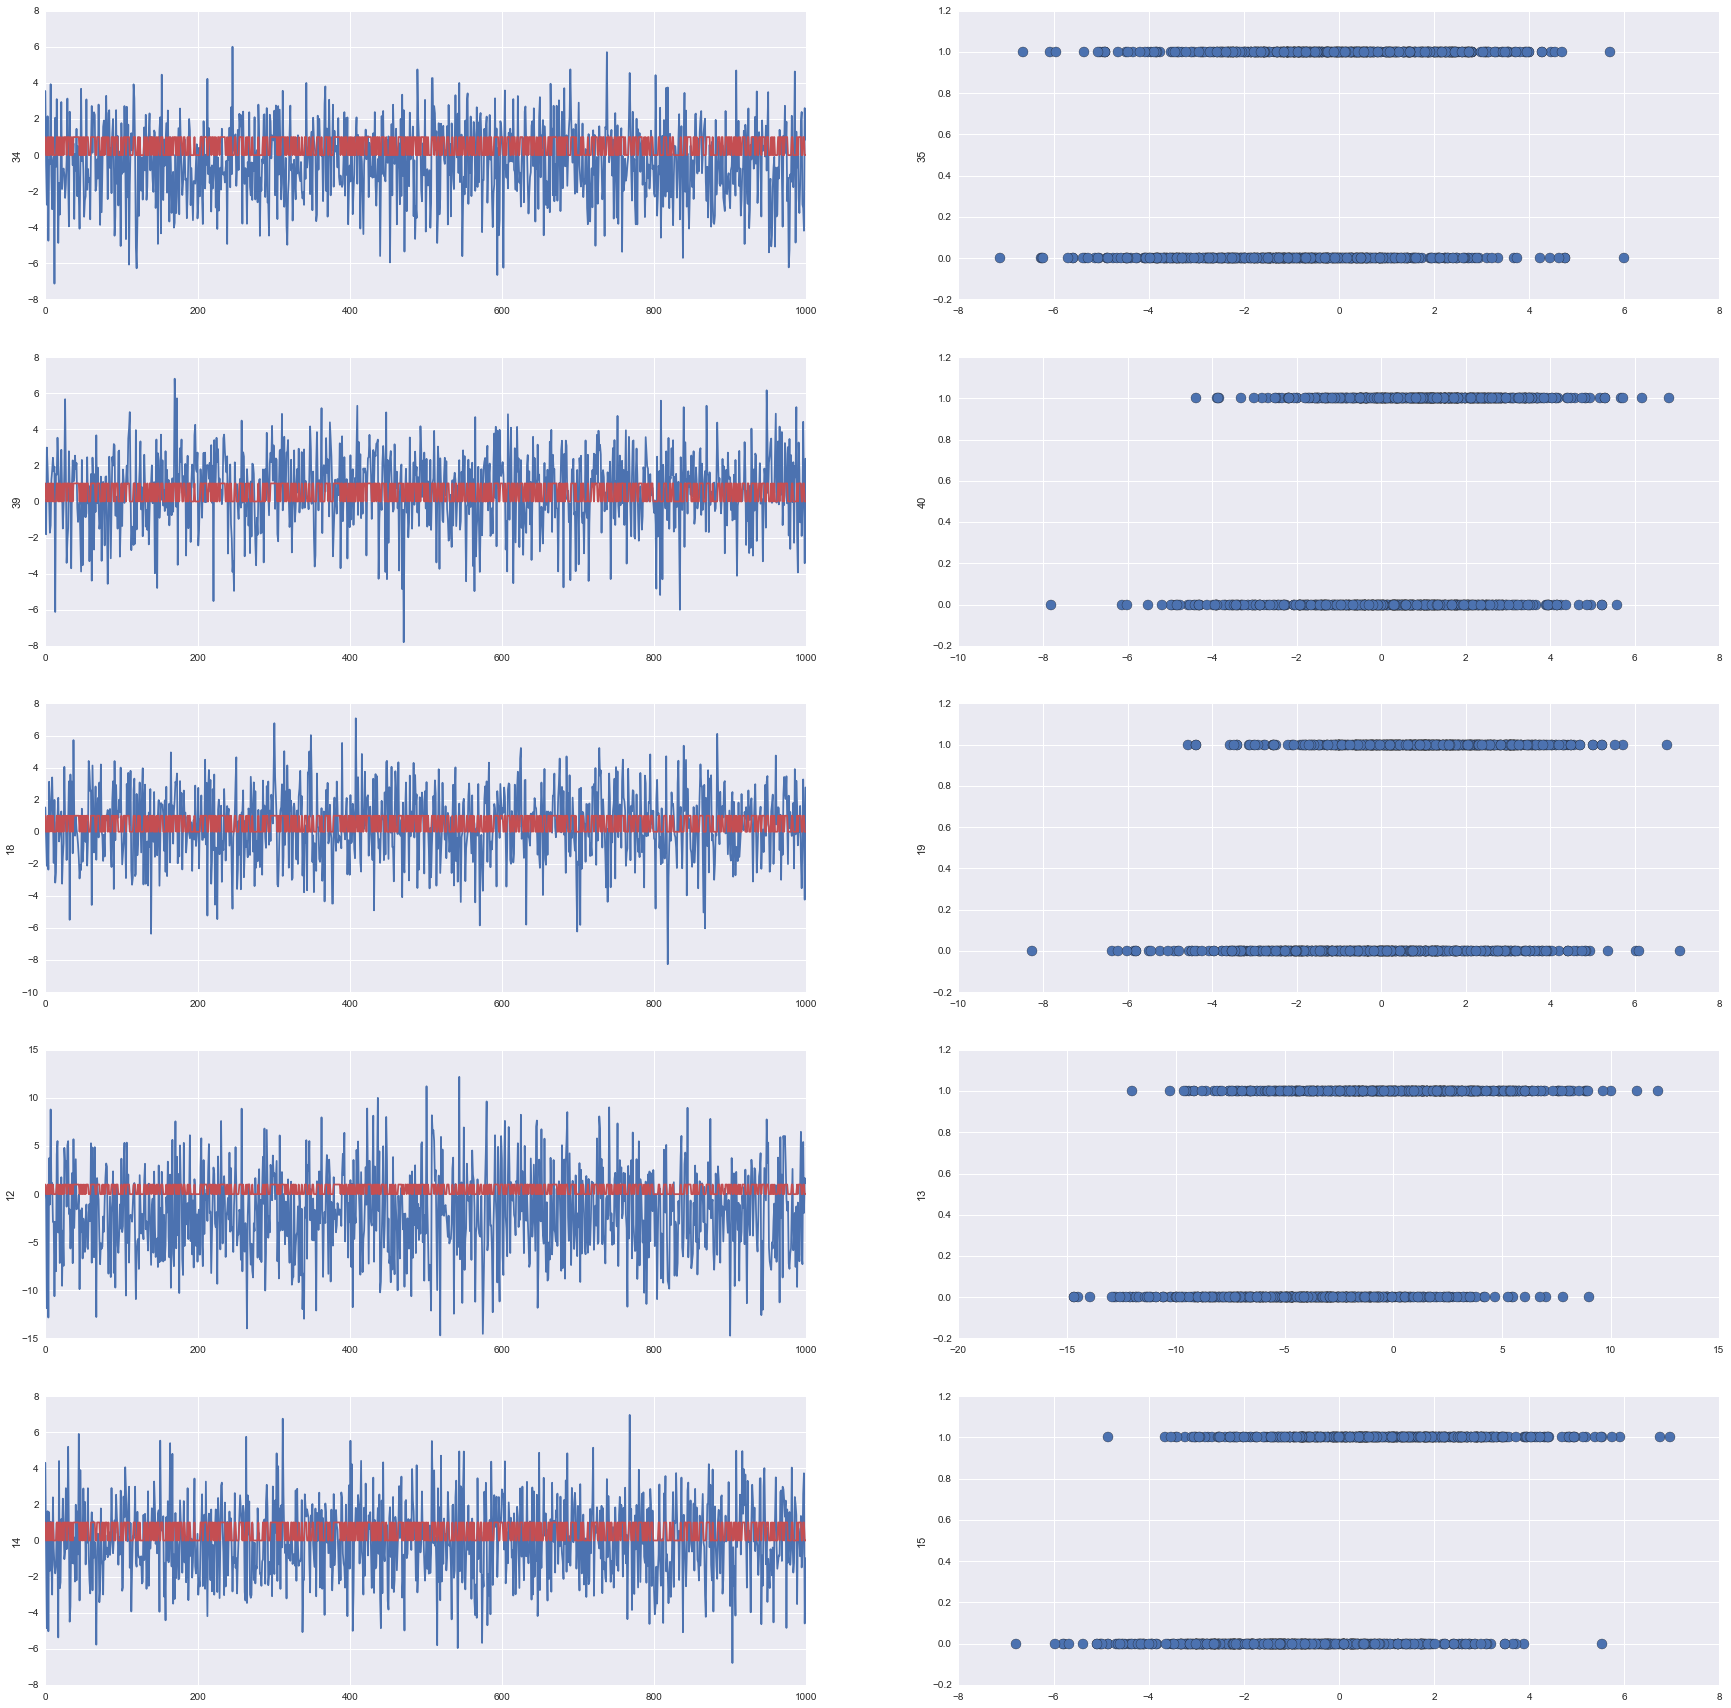

In [16]:
# show multivariate data
# this needs some fix given the high number of features
# the code below will show the 5 features having higher correlation with labels
data_join = np.concatenate((np_train,np_labels),axis=1)

corrcoef = np.corrcoef(data_join.T)
corrcoef = corrcoef[-1,:-1]
correlated_features = np.argsort(corrcoef)
high_corr = correlated_features[-5:]
kdx = 1
plt.figure(figsize=(30,30))
for hcIdx in high_corr:
    plt.subplot(5,2,2*kdx-1)
    plt.plot(np_train[:,hcIdx])
    plt.plot(np_labels,'r')
    plt.ylabel(hcIdx)
    plt.subplot(5,2,2*kdx)
    plt.scatter(np_train[:,hcIdx],np_labels,s=100)
    plt.ylabel(hcIdx+1)
    kdx+=1

(-20.142091456939099,
 22.199062772616678,
 -22.110159034158116,
 20.054520412169651)

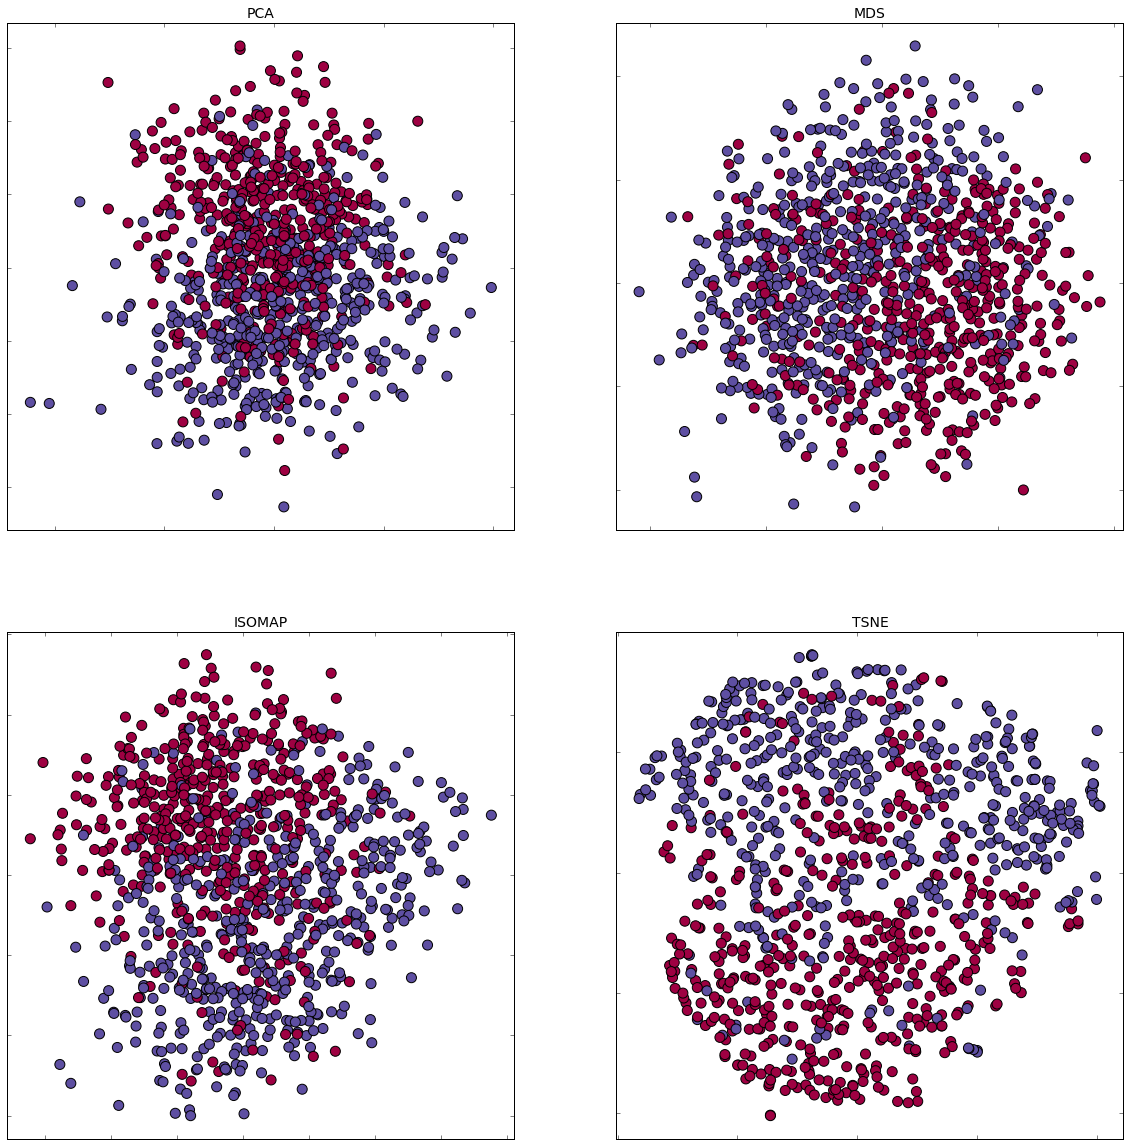

In [48]:
# dimensionality reduction 

"""
Basic version
TODO: Improve this version using a pipeline where the only modification should be 
add/remove name of dimensionality reduction to use
""" 

from sklearn.decomposition import PCA
from sklearn               import manifold
from matplotlib.ticker     import NullFormatter

n_neighbors  = int(0.01*train.shape[0])
n_components = 2
s  = 100
fs = 14

# PCA
pca       = PCA(n_components = 2)
train_pca = pca.fit_transform(train)

# MDS 
mds       = manifold.MDS(n_components=n_components, max_iter=100,n_init=1)
train_mds = mds.fit_transform(train)

# ISOMAP
isomap       = manifold.Isomap(n_components=n_components, n_neighbors = n_neighbors)
train_isomap = isomap.fit_transform(train)

# tSNE
tsne       = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
train_tsne = tsne.fit_transform(train)

fig = plt.figure(figsize=(20, 20))
plt.suptitle("Low Dimensional Projections", fontsize=14)

plt.figure(figsize=(20,20))
# plot pca
ax1 = plt.subplot(2,2,1)
plt.scatter(train_pca[:, 0], train_pca[:, 1],s=s,c=labels, cmap=plt.cm.Spectral)
plt.title("PCA", fontsize=fs)
ax1.xaxis.set_major_formatter(NullFormatter())
ax1.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
# plot mds
ax2 = plt.subplot(2,2,2)
plt.scatter(train_mds[:, 0], train_mds[:, 1],s=s,c=labels, cmap=plt.cm.Spectral)
plt.title("MDS", fontsize=fs)
ax2.xaxis.set_major_formatter(NullFormatter())
ax2.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
# plot isomap
ax3 = plt.subplot(2,2,3)
plt.scatter(train_isomap[:, 0], train_isomap[:, 1],s=s,c=labels, cmap=plt.cm.Spectral)
plt.title("ISOMAP", fontsize=fs)
ax3.xaxis.set_major_formatter(NullFormatter())
ax3.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
# plot tsne
ax4 = plt.subplot(2,2,4)
plt.scatter(train_tsne[:, 0], train_tsne[:, 1],s=s,c=labels, cmap=plt.cm.Spectral)
plt.title("TSNE", fontsize=fs)
ax4.xaxis.set_major_formatter(NullFormatter())
ax4.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')